In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2p1bmlvcmp1bWJvbmcvRGVza3RvcC9wZXJzb25hbC13ZWJzaXRlLzFBL1ZhcmlhYmxlc0FsZWFDb250aW5lcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/v8/l5q0bw4s2ln17s59y7cc86rm0000gn/T/ipykernel_65924/149536756.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/abc.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/io.py": 1728279722.0, "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/stat.py": 1728279722.0, "/Libr

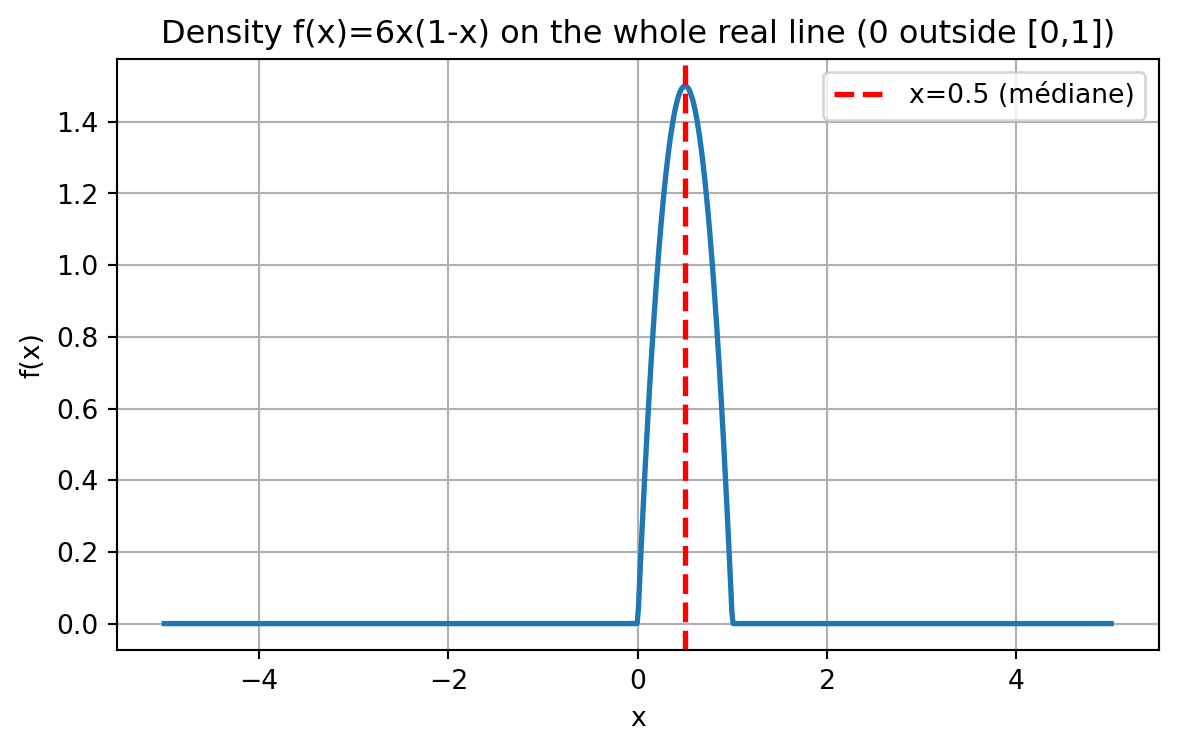

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define density on R, zero outside [0,1]
def f(x):
    return np.where((x>=0)&(x<=1), 6*x*(1-x), 0)

# Real line range
x = np.linspace(-5, 5, 800)
y = f(x)

plt.figure(figsize=(7,4))
plt.plot(x, y, linewidth=2)
plt.axvline(0.5, linewidth=2, color='red', linestyle='--', label='x=0.5 (médiane)')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Density f(x)=6x(1-x) on the whole real line (0 outside [0,1])")
plt.grid(True)
plt.show()

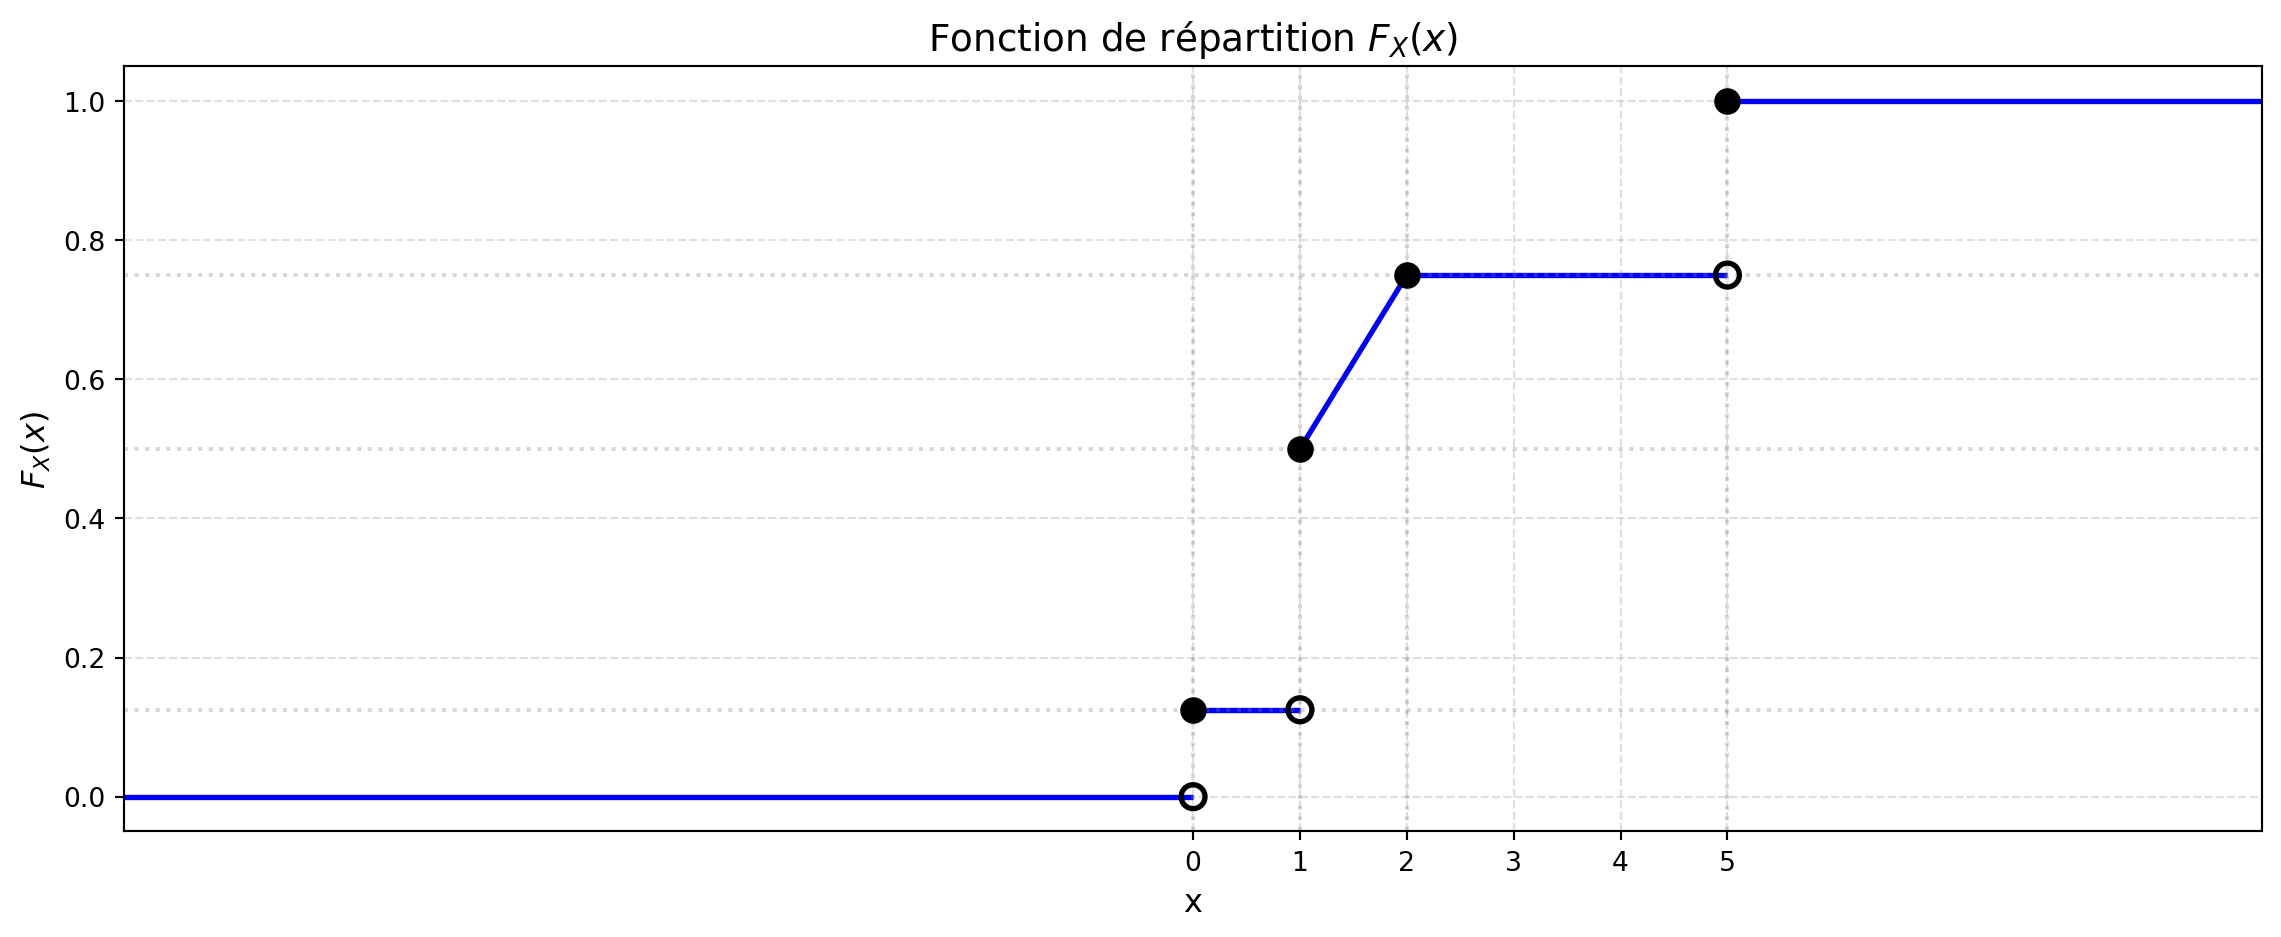

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    x = np.asarray(x)
    return np.where(
        x < 0, 0,
        np.where(
            x < 1, 1/8,
            np.where(
                x < 2, (x + 1)/4,
                np.where(
                    x < 5, 3/4,
                    1
                )
            )
        )
    )

# Segments de la fonction de répartition
segments_horizontaux = [
    (-10, 0, 0),     # de x=-10 à x=0 : F=0
    (0, 1, 1/8),     # de x=0 à x=1 : F=1/8
    (2, 5, 3/4),     # de x=2 à x=5 : F=3/4
    (5, 10, 1)       # de x=5 à x=10 : F=1
]

plt.figure(figsize=(12, 5))

# Tracé des segments horizontaux
for x_start, x_end, y_val in segments_horizontaux:
    plt.hlines(y_val, x_start, x_end, colors="blue", linewidth=2)

# Tracé du segment linéaire entre x=1 et x=2 : F(x) = (x+1)/4
x_linear = np.linspace(1, 2, 100)
y_linear = (x_linear + 1) / 4
plt.plot(x_linear, y_linear, 'b-', linewidth=2)

# Points ouverts (limite à gauche non incluse)
x_open = [0, 1, 5]
y_open = [0, 1/8, 3/4]
plt.scatter(x_open, y_open, facecolors="none", edgecolors="black", s=80, zorder=3, linewidths=2)

# Points fermés (valeur incluse)
x_closed = [0, 1, 2, 5]
y_closed = [1/8, 2/4, 3/4, 1]
plt.scatter(x_closed, y_closed, color="black", s=80, zorder=3)

# Format graphique
plt.xlabel("x", fontsize=12)
plt.ylabel("$F_X(x)$", fontsize=12)
plt.title("Fonction de répartition $F_X(x)$", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)
plt.xlim(-10, 10)
plt.ylim(-0.05, 1.05)

# Définir les graduations sur l'axe des x
plt.xticks([0, 1, 2, 3, 4, 5])

# Ajout de repères pour les valeurs importantes
plt.axhline(y=1/8, color='gray', linestyle=':', alpha=0.3)
plt.axhline(y=1/2, color='gray', linestyle=':', alpha=0.3)
plt.axhline(y=3/4, color='gray', linestyle=':', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.3)
plt.axvline(x=1, color='gray', linestyle=':', alpha=0.3)
plt.axvline(x=2, color='gray', linestyle=':', alpha=0.3)
plt.axvline(x=5, color='gray', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()